<a href="https://colab.research.google.com/github/anniechen0506/Machine-Learning-Fall-2023/blob/main/7_Image_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Fashion MNIST dataset

In this homework problem, we will work with the Fashion MNIST data that is also available in the Keras library:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

The dataset is fairly analogous to the MNIST data -- it's also 28 by 28 pixel images, although in this case the images are of fashion items and the labels correspond to different fashion items -- here is the label	description:
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

The problem, obviously, is to predict what kind of fashion item is on the image.

Let's take a look at the data:

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


...and at a few of the items:

2


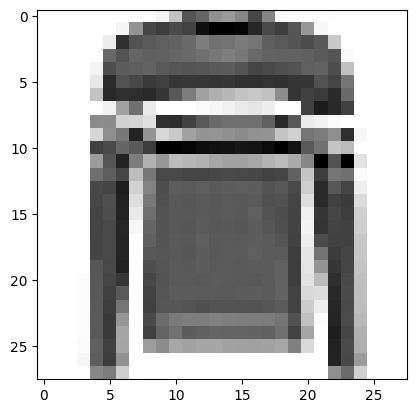

In [ ]:
image_index = 5
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

...so this is a pullover.

9


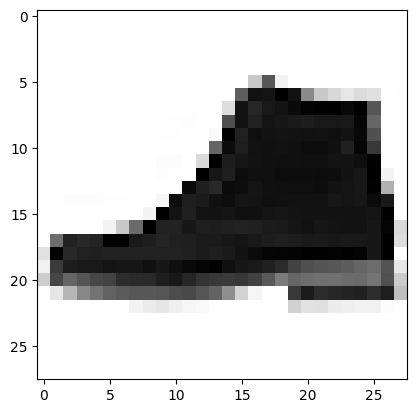

In [ ]:
image_index = 42
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

So this is an ankle boot.

We want to build a neural network that take the images as the inputs (our x-s) and predict the correspondoing digits (our x-s).

In doing so, we convert the outcomes to categorical variables:

In [ ]:

num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

**Objective:** Build a neural network model that can classify the fashion items.

Building and Training a DL Model
We start by building a feed-forward neural network. For that, we convert the images to vectors with 28 * 28 = 784 resulting features:

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

And we scale by dividing by the maximal pixel darkness:

In [ ]:
x_train = x_train / 255
x_test = x_test/ 255

And let's build a feed-forward model, as we did before. An important difference, though, is that we use the soft-max function as the output layer for this multi-class problem, and we use 'categorical_crossentropy' as the (multi-class) loss function:

In [ ]:
model = Sequential()
model.add(Dense(50, input_shape=(784, ), activation='relu', name='dense_1'))
model.add(Dense(25, activation='relu', name='dense_2'))
model.add(Dense(10, activation='softmax', name='dense_output'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                39250     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_output (Dense)        (None, 10)                260       
                                                                 
Total params: 40785 (159.32 KB)
Trainable params: 40785 (159.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0753 - accuracy: 0.6027 - val_loss: 0.7460 - val_accuracy: 0.7241
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6592 - accuracy: 0.7569 - val_loss: 0.6252 - val_accuracy: 0.7673
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5853 - accuracy: 0.7870 - val_loss: 0.5834 - val_accuracy: 0.7898
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5495 - accuracy: 0.8023 - val_loss: 0.5610 - val_accuracy: 0.7975
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5261 - accuracy: 0.8115 - val_loss: 0.5444 - val_accuracy: 0.8027
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5068 - accuracy: 0.8192 - val_loss: 0.5243 - val_accuracy: 0.8114
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4911 - accuracy: 0.8249 - val_loss: 0.5167 - val_accuracy:

1/1 [==============================] - 0s 18ms/step


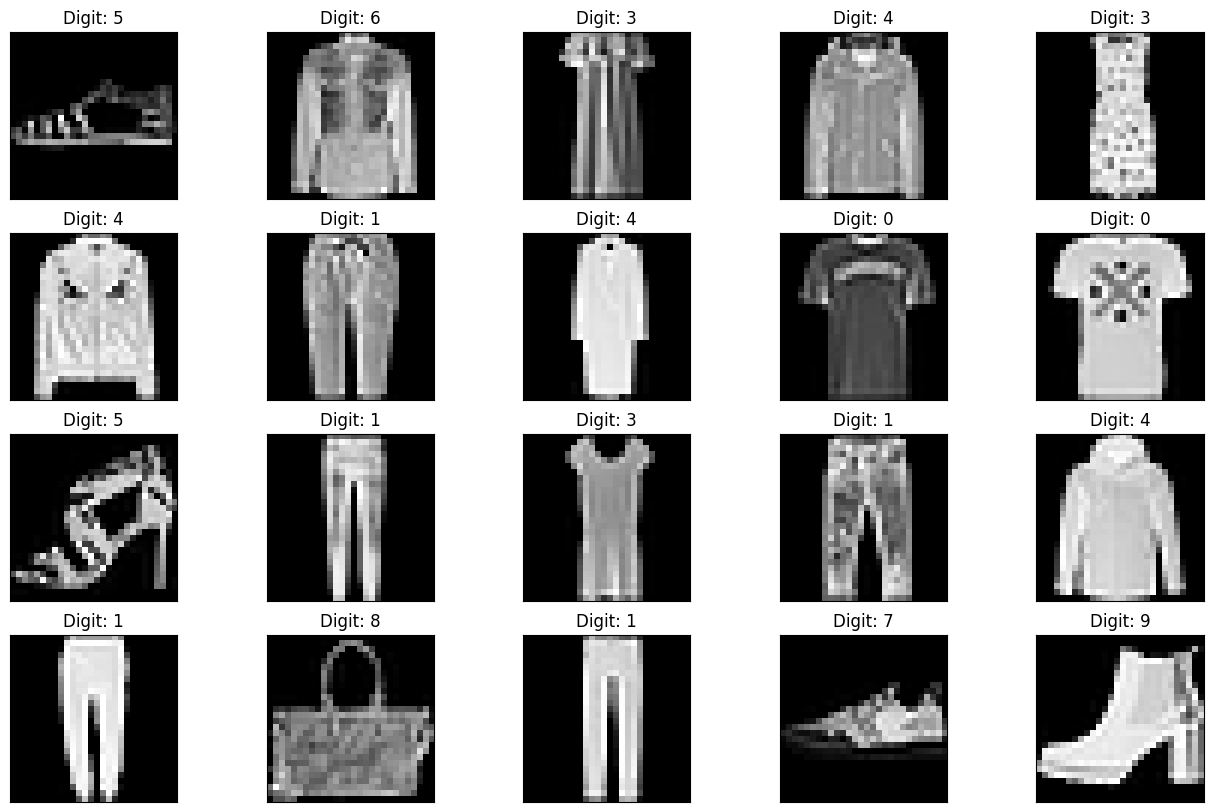

In [ ]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])

random.seed(5)

plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(x_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 784)))[0], axis=-1)
    plot_digit(image.reshape(28,28), digit, plt, i)

plt.show()

**Building and Training a CNN Model**

Next let's see if adding convolutional layers can improve the performance.

Let's reload the data and reset the seed:



In [ ]:
np.random.seed(42)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

To use the keras interface for convolutional layers, we need to reformat the data---which requires three dimensions. So we reshape the data, and we also scale the data by dividing it by the max pixel value (255).

In [ ]:
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train / 255
x_test = x_test/ 255

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 8)                 43272     
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
Total params: 43682 (170.63 KB)
Trainable params: 43682 (170.63 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size = 128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 27s 56ms/step - loss: 0.7164 - accuracy: 0.7463 - val_loss: 0.4639 - val_accuracy: 0.8399
Epoch 2/20
469/469 [==============================] - 24s 52ms/step - loss: 0.4242 - accuracy: 0.8526 - val_loss: 0.4174 - val_accuracy: 0.8535
Epoch 3/20
469/469 [==============================] - 22s 47ms/step - loss: 0.3729 - accuracy: 0.8703 - val_loss: 0.3721 - val_accuracy: 0.8694
Epoch 4/20
469/469 [==============================] - 24s 52ms/step - loss: 0.3420 - accuracy: 0.8818 - val_loss: 0.3531 - val_accuracy: 0.8779
Epoch 5/20
469/469 [==============================] - 23s 49ms/step - loss: 0.3223 - accuracy: 0.8873 - val_loss: 0.3554 - val_accuracy: 0.8744
Epoch 6/20
469/469 [==============================] - 24s 52ms/step - loss: 0.3072 - accuracy: 0.8926 - val_loss: 0.3234 - val_accuracy: 0.8859
Epoch 7/20
469/469 [==============================] - 25s 52ms/step - loss: 0.2920 - accuracy: 0.8981 - val_loss: 0.3147 - val_accuracy:

1/1 [==============================] - 0s 33ms/step


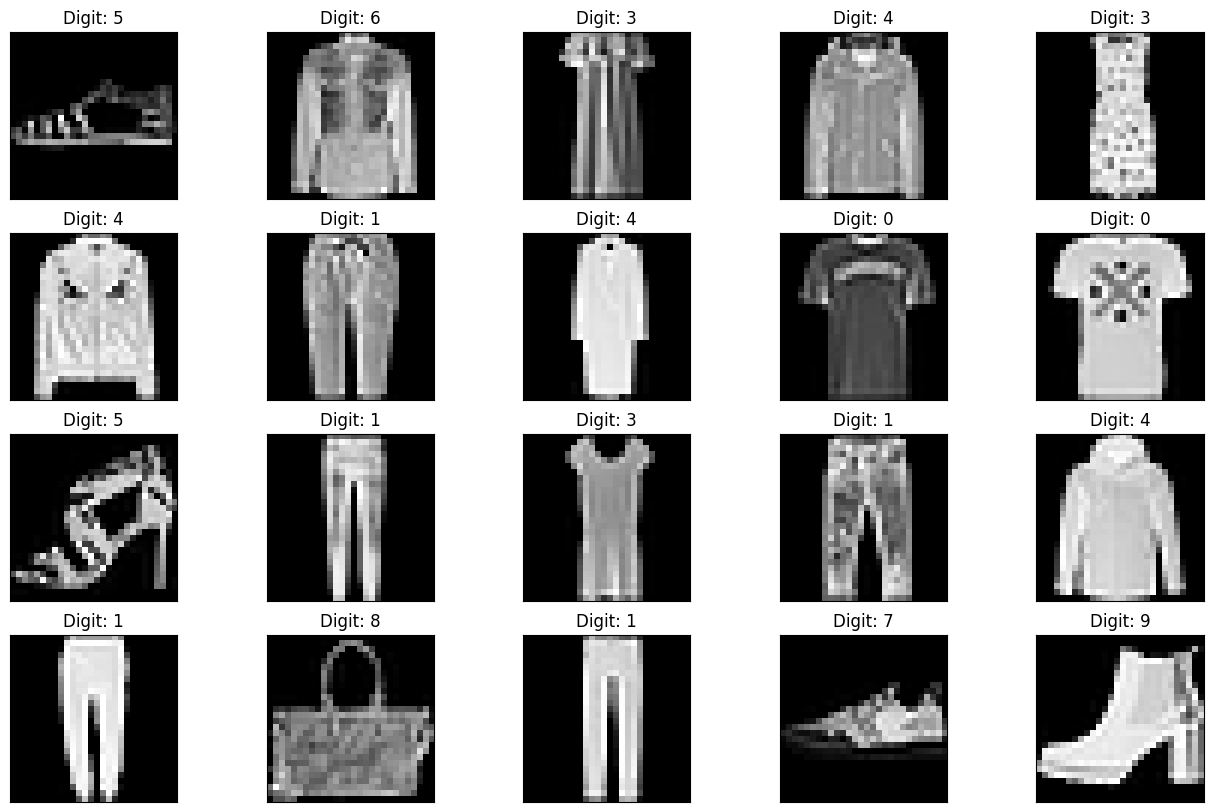

In [ ]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])

random.seed(5)

plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(x_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)

plt.show()

Evaluation - Confusion Matrix


313/313 [==============================] - 3s 8ms/step


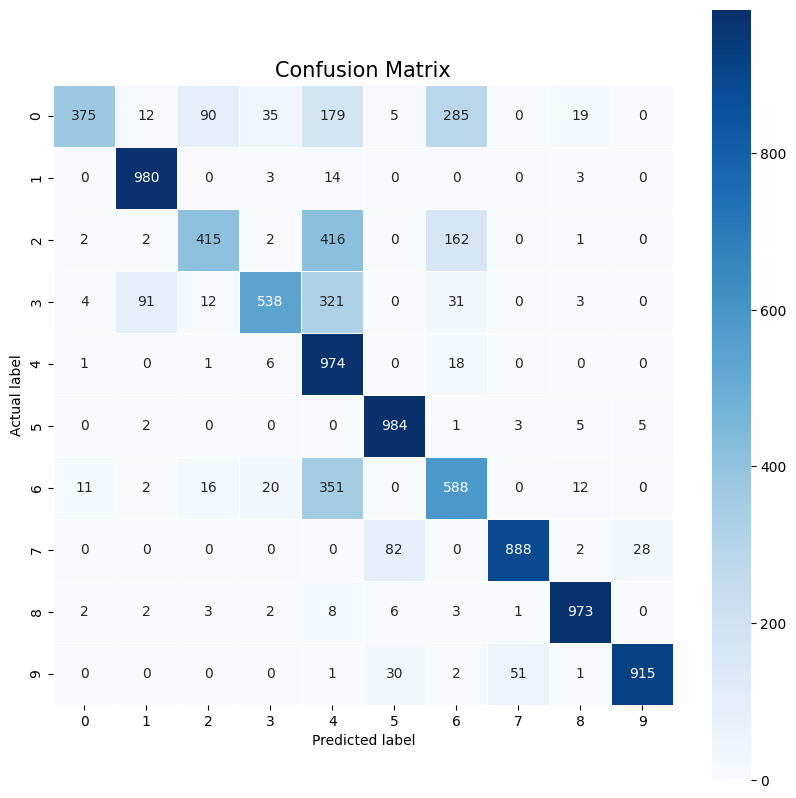

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

(X_train, y_train), (X_test, y_true) = fashion_mnist.load_data()
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size = 15)

# Show the plot
plt.show()
